# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [3]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [4]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [5]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [6]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [8]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [9]:
nfeatures = x_train.shape[1]
nfeatures

3

In [10]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [11]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5878 - val_loss: 0.5714
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5800 - val_loss: 0.5612
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5612 - val_loss: 0.5519
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5666 - val_loss: 0.5446
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5516 - val_loss: 0.5374
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5518 - val_loss: 0.5316
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5443 - val_loss: 0.5266
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5366 - val_loss: 0.5227
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5313 - val_loss: 0.5188
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5256 - val_loss: 0.5150
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5254 - val_loss: 0.5123
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5392 - val_l

* 학습결과 그래프

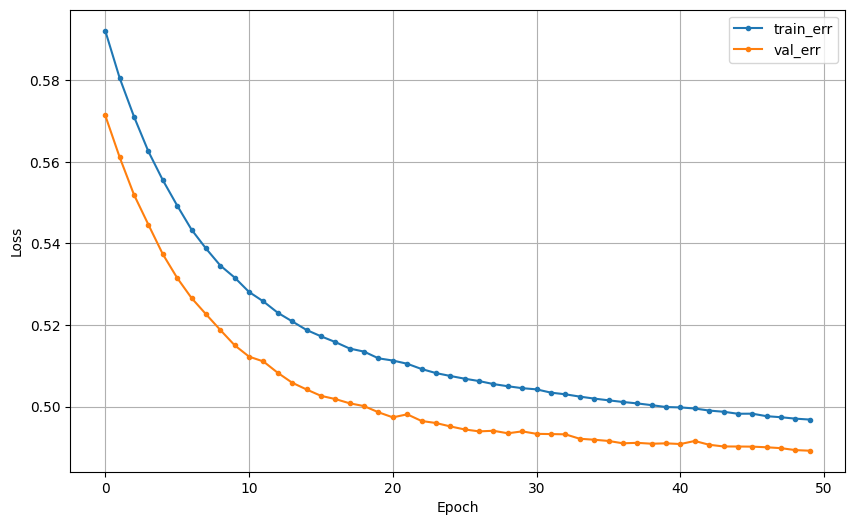

In [12]:
dl_history_plot(history)

### (3) 예측 및 검증

In [13]:
pred = model.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [14]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       170
           1       0.73      0.68      0.71        98

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [15]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [16]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [18]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [19]:
nfeatures = x_train.shape[1]
nfeatures

8

In [20]:
# 메모리 정리
clear_session()

model2=Sequential([ Input(shape=(nfeatures,)),
                   Dense(1, activation='sigmoid') ])

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

* compile + 학습

In [21]:
model2.compile(optimizer=Adam(learning_rate=0.1),loss='binary_crossentropy')

result=model2.fit(x_train,y_train,epochs=50, validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.7450 - val_loss: 0.5524
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5494 - val_loss: 0.4896
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4994 - val_loss: 0.4654
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4801 - val_loss: 0.4647
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4618 - val_loss: 0.4506
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4435 - val_loss: 0.4513
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4829 - val_loss: 0.4444
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4693 - val_loss: 0.4402
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4617 - val_loss: 0.4440
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4712 - val_loss: 0.4418
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4322 - val_loss: 0.4491
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4349 - val_l

* 학습결과 그래프

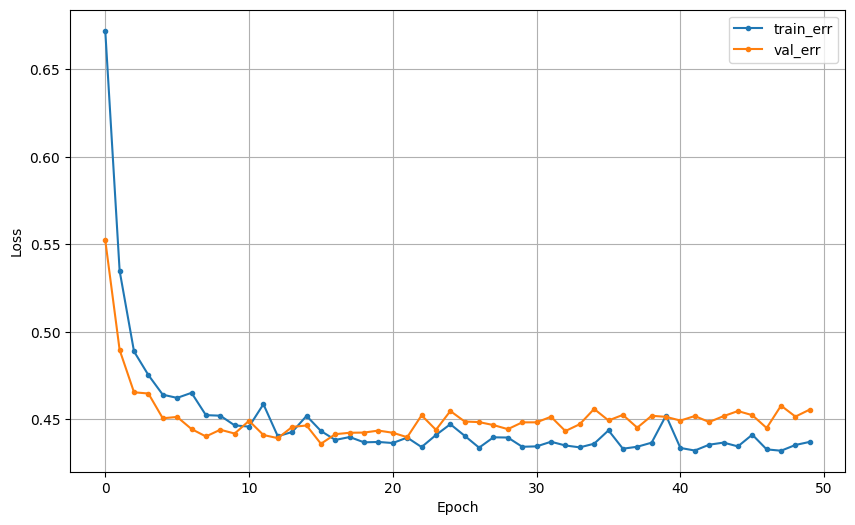

In [22]:
dl_history_plot(result)

* 예측 및 검증

In [23]:
pred2 = model2.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred2 = np.where(pred2 >= .5, 1, 0)

print(classification_report(y_val, pred2))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       170
           1       0.73      0.62      0.67        98

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.78      0.78      0.78       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [24]:
n = x_train.shape[1]
n

8

In [25]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([Input(shape = (n,)),
                     Dense( 4, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [26]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6595 - val_loss: 0.5931
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6254 - val_loss: 0.5675
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5851 - val_loss: 0.5418
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5546 - val_loss: 0.5140
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5325 - val_loss: 0.4911
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4868 - val_loss: 0.4735
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4970 - val_loss: 0.4597
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4770 - val_loss: 0.4495
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5209 - val_loss: 0.4433
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4357 - val_loss: 0.4349
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4613 - val_loss: 0.4293
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4396 - val_l

* 학습결과 그래프

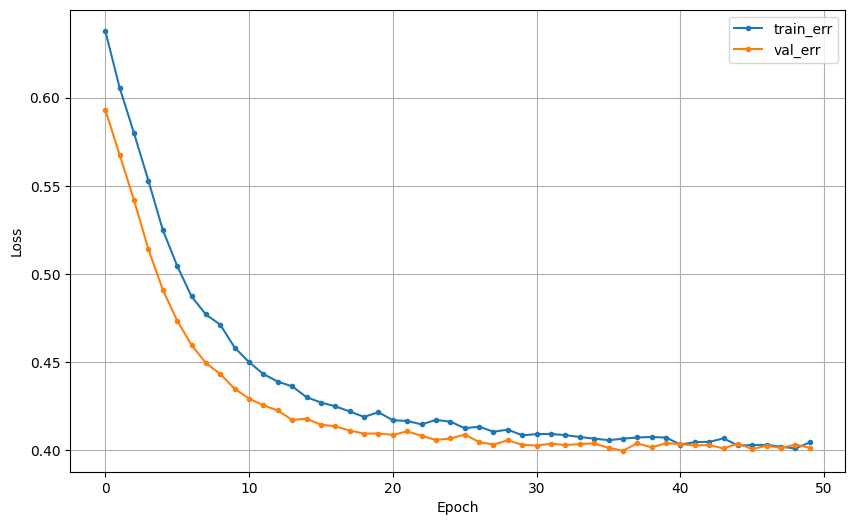

In [27]:
dl_history_plot(hist)

* 예측 및 검증

In [28]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 >= 0.5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [29]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       170
           1       0.79      0.55      0.65        98

    accuracy                           0.78       268
   macro avg       0.79      0.73      0.75       268
weighted avg       0.79      0.78      0.77       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [30]:
n=x_train.shape[1]
n

8

In [31]:
clear_session()
model3=Sequential([Input(shape=(n,)),
                  Dense(16,activation='relu'),
                  Dense(1,activation='sigmoid')])

model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model3.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy')

result=model3.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6252 - val_loss: 0.5651
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5447 - val_loss: 0.5086
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4916 - val_loss: 0.4807
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4881 - val_loss: 0.4556
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4946 - val_loss: 0.4503
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4776 - val_loss: 0.4381
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4106 - val_loss: 0.4274
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4184 - val_loss: 0.4247
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4265 - val_loss: 0.4175
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4173 - val_loss: 0.4175
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4329 - val_loss: 0.4120
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3929 - val_l

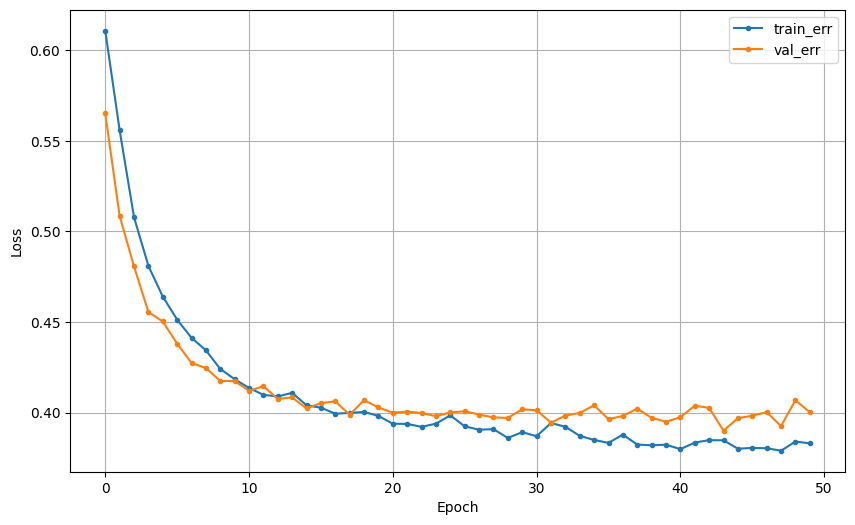

In [33]:
dl_history_plot(result)

In [34]:

pred3 = model3.predict(x_val)
# pred[:5]
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred3 = np.where(pred3 >= .5, 1, 0)

print(classification_report(y_val, pred3))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       170
           1       0.74      0.60      0.66        98

    accuracy                           0.78       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.78      0.77       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
